Análises no setor da educação

Resumo das notas obtidas por um grupo de alunos das variáveis disciplinas

In [1]:
# Importando as bibliotecas que irei utilizar

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:
# Importando a base de dados 

dados = pd.read_csv("StudentsPerformance.csv")

# dimensão

dados.shape


(1000, 8)

In [4]:
# Head

dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


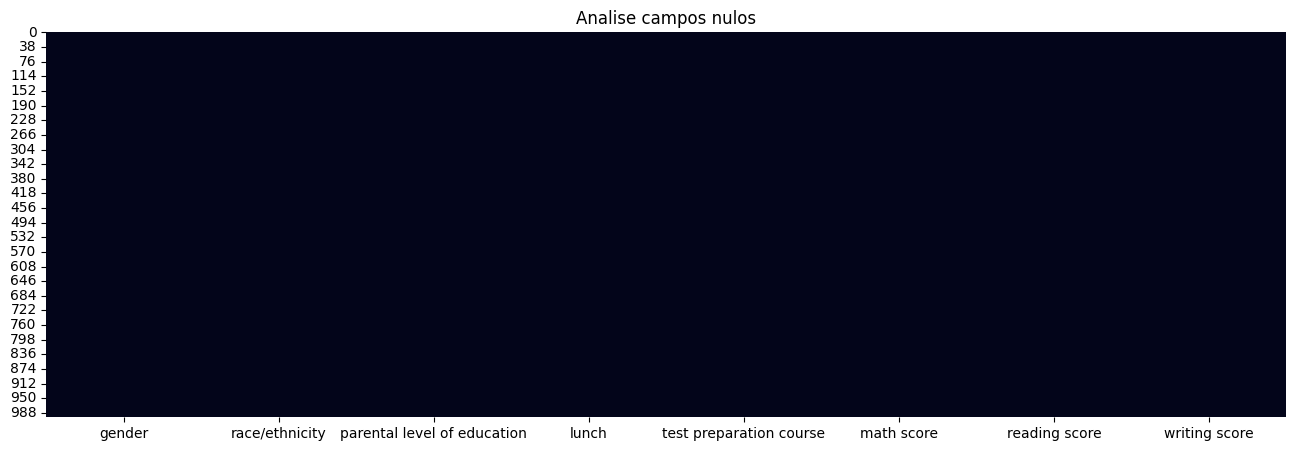

In [5]:
# Campos nulos
Nulos = dados.isnull()

plt.figure( figsize=(16,5 ) )
plt.title('Analise campos nulos')
sns.heatmap( Nulos, cbar=False );

In [6]:
# Check list dos não duplicados

dados.nunique()



gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [7]:
# Duplicados

dados.duplicated().sum()

0

In [8]:
# Estatistca

dados.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:

# Gerando informações na nossa base de dados
dados.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
#Verificando a proporção de  Feminino e Masculino
dados['gender'].value_counts( normalize=True ) * 100

gender
female    51.8
male      48.2
Name: proportion, dtype: float64

In [11]:
#Verificando a proporção de  Entre os Grupos
dados['race/ethnicity'].value_counts( normalize=True ) * 100

race/ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: proportion, dtype: float64

In [13]:
#Verificando a proporção de  entre os tipos de alimentação consumido dentro da escola
dados['lunch'].value_counts( normalize=True ) * 100

lunch
standard        64.5
free/reduced    35.5
Name: proportion, dtype: float64

In [14]:

#Verificando a proporção de  quem fez alguma preparação para prova e os que não optaram por preparação
dados['test preparation course'].value_counts( normalize=True ) * 100

test preparation course
none         64.2
completed    35.8
Name: proportion, dtype: float64

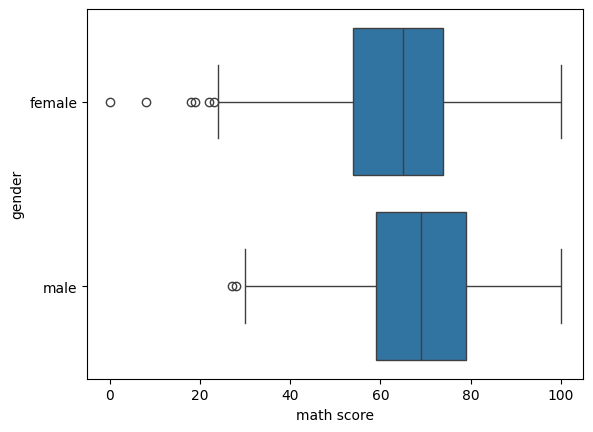

In [15]:

#Podemos ver nesse boxplot a distribuição das notas de matemática segmentada por gênero, onde o masculino se sobresai do femino.
sns.boxplot( data=dados, x='math score', y='gender');

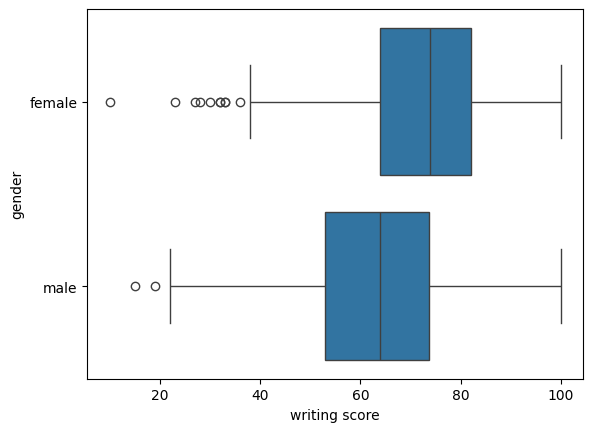

In [16]:
#Podemos ver nesse boxplot a distribuição das notas de leitura segmentada por gênero, onde o feminino se sobresai do masculino.
sns.boxplot( data=dados, x='writing score', y='gender');

In [17]:
dados.groupby( by=['gender'] ).describe()['math score'].reset_index()

,gender,count,mean,std,min,25%,50%,75%,max
0,female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
1,male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


<Axes: xlabel='math score', ylabel='parental level of education'>

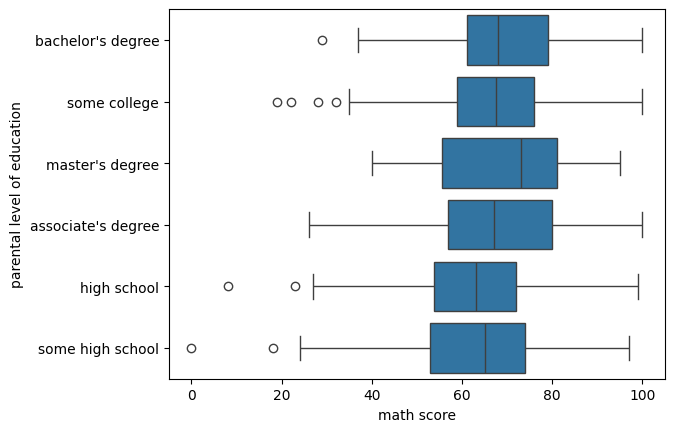

In [18]:

#Podemos ver nesse boxplot a distribuição das notas de matemática segmentada por grau de escolaridade dos pais, é visivel que isso influência na nota dos filhos
sns.boxplot( data=dados, x='math score', y='parental level of education')

In [ ]:

#Podemos ver nesse boxplot a distribuição das notas de matemática, segmentada por quem escolheu se preparar ou não. É nítido, que quem se preparou obteve maiores notas.
sns.boxplot( data=dados, x='math score', y='test preparation course')
     

<Axes: xlabel='math score', ylabel='writing score'>

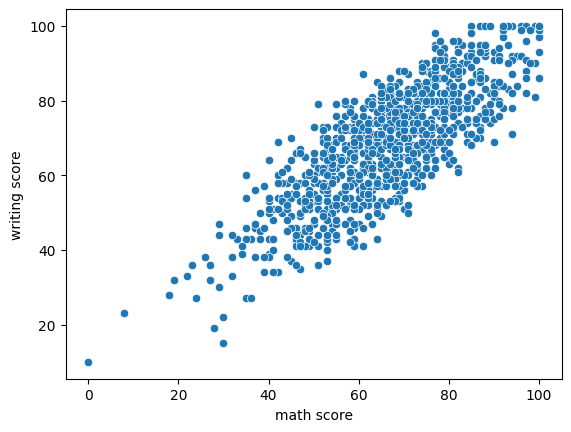

In [19]:

#Verificando se a correlação entre a nota de matemática e de leitura. Podemos ver que há uma correlação positiva.
sns.scatterplot( data=dados, x='math score', y='writing score')